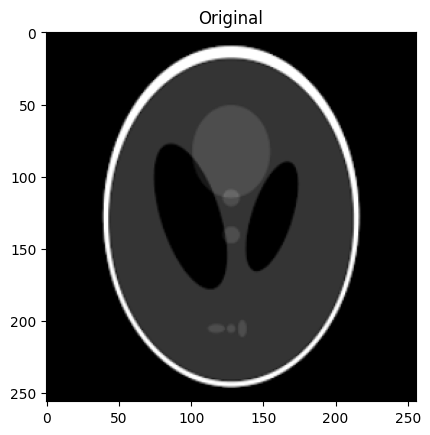

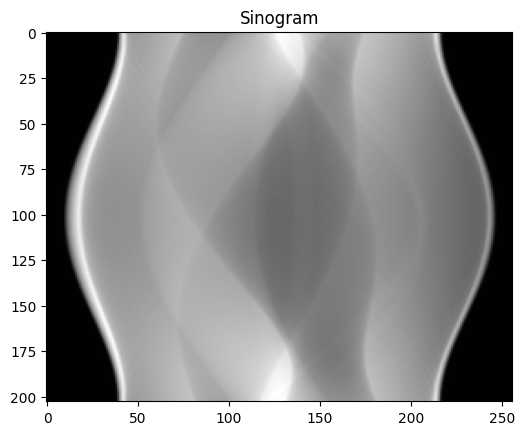

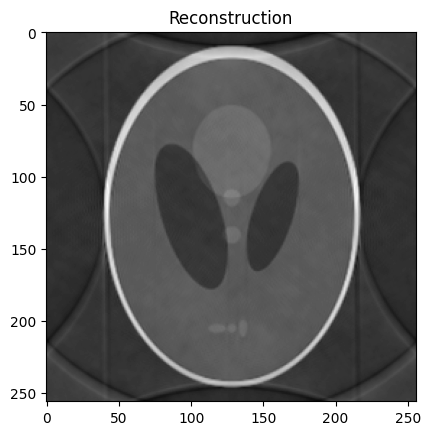

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import fftpack, misc, interpolate, ndimage
import skimage.transform



image = plt.imread('descarga.png')
if(image.ndim > 2):
    image_2D = image[:, :, 0] 


S=256 #Fourier resolution/Size of the original image
N=203 #Number of proyections to make (or angles)

#original
image_2D=skimage.transform.resize(image_2D,(S,S),mode='constant') 
plt.figure()
plt.title("Original")
plt.imshow(image_2D)
plt.gray()  #In case of color


#sinogram
#Radon Transform 
sinogram = []
for i in range(N):
    row = ndimage.rotate(image_2D,np.rad2deg((np.pi*i)/N), order=3, reshape=False, mode='constant', cval=0.0)
    sinogram.append (np.sum(row, axis=0))  
sinogram = np.array(sinogram)
plt.figure()
plt.title("Sinogram")
plt.imshow(sinogram)


#Reconstruction
#We need the shift for symetry (remember kspace) and the every row is transform to Fourier domain by 1D FFT
sinogram_fft_rows=fftpack.fftshift(fftpack.fft(fftpack.ifftshift(sinogram,axes=1)),axes=1)

# Coordinates of sinogram FFT-ed rows' samples in 2D FFT space
a=np.array([(np.pi*i)/N for i in range(N)])
r=np.arange(S)-S/2
r,a=np.meshgrid(r,a)
r=r.flatten()
a=a.flatten()
srcx=(S/2)+r*np.cos(a)
srcy=(S/2)+r*np.sin(a)

# Coordinates of regular grid in 2D FFT space
dstx,dsty=np.meshgrid(np.arange(S),np.arange(S))
dstx=dstx.flatten()
dsty=dsty.flatten()

# Interpolation of the 2D Fourier space grid from the transformed sinogram rows
fft2=interpolate.griddata(
    (srcy,srcx),#points
    sinogram_fft_rows.flatten(),#values
    (dsty,dstx),#meshgrid
    method='cubic',
    fill_value=0.0
    ).reshape((S,S))

# Transform from 2D Fourier space back to a reconstruction of the original image
recon=np.real(fftpack.fftshift(fftpack.ifft2(fftpack.ifftshift(fft2))))


plt.figure()
plt.title("Reconstruction")
plt.imshow(recon) #Check de vmin = 0.0 and vmax  = 1.0
plt.gray()

plt.show()